# Sports Car Prices Project - Visualization Creation-Questions Answered

## Max Enabnit, Greg Fagan, Luke Rubin

##### Notebook contains visualizations to answer questions 

### 3.1 Most Influential Features on Price 

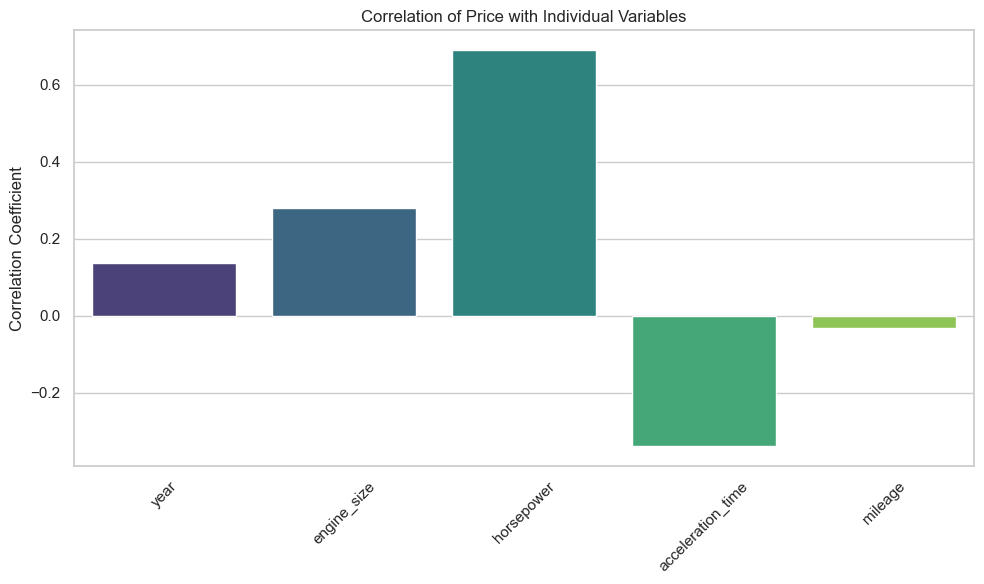

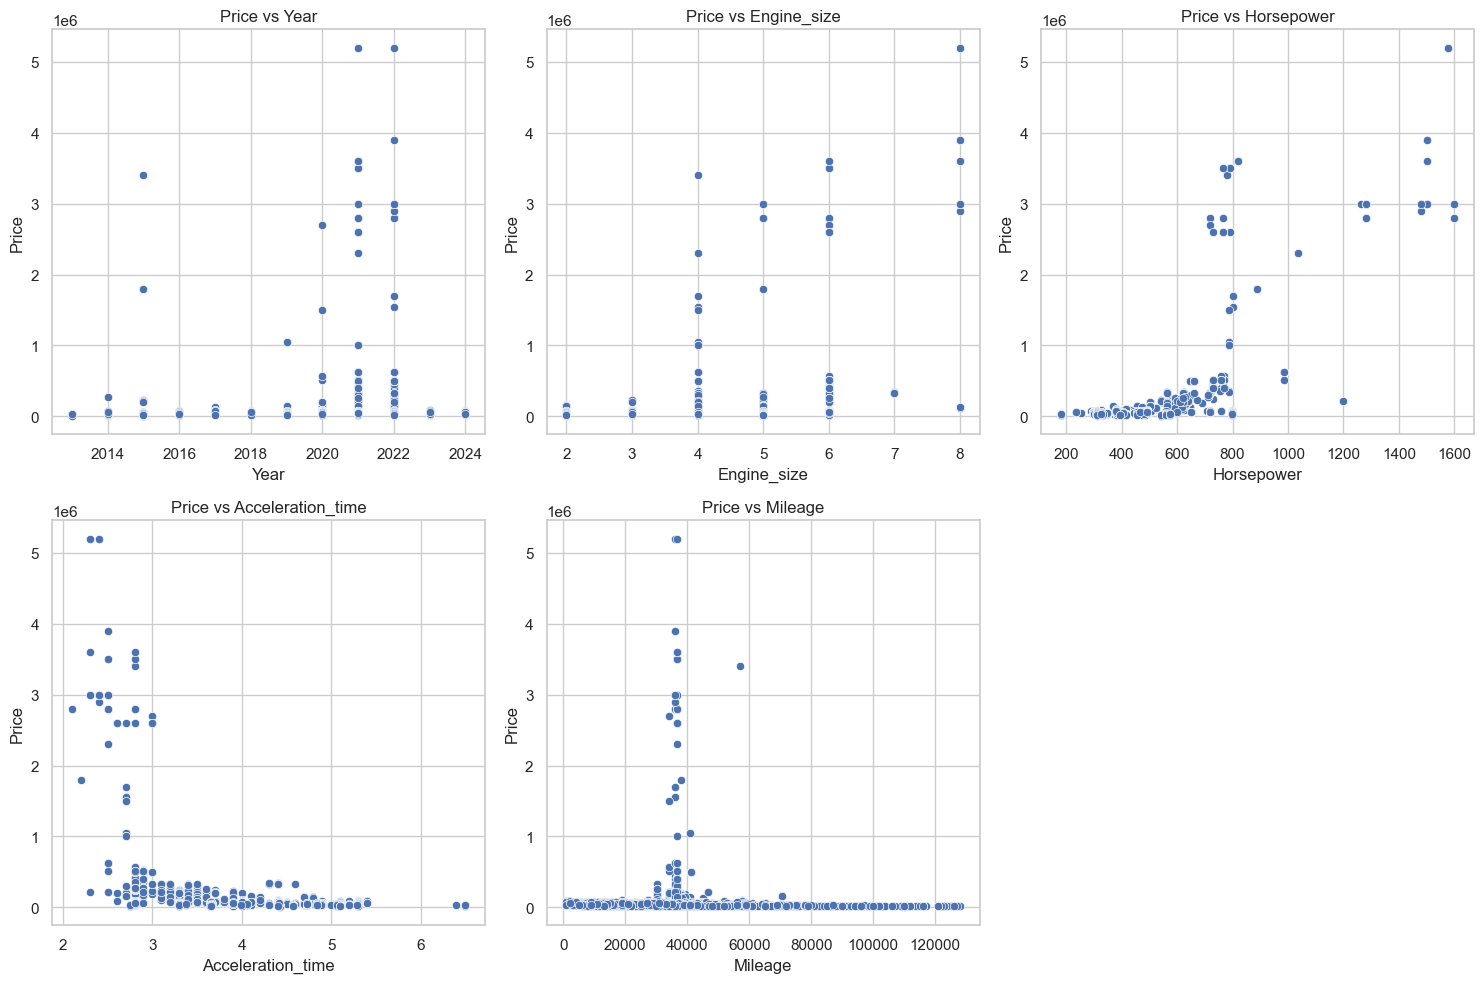

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('Combined.csv')

# Set up the plotting environment
sns.set(style="whitegrid")

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot correlation between price and individual variables
correlations = data.corr(numeric_only=True)['price'].drop('price')  # Exclude price itself

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.title("Correlation of Price with Individual Variables")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plots for Price vs Individual Features
features = ['year', 'engine_size', 'horsepower', 'acceleration_time', 'mileage']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f"Price vs {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Price")
plt.tight_layout()
plt.show()



### 3.2 Least & Most Expensive Car makes 

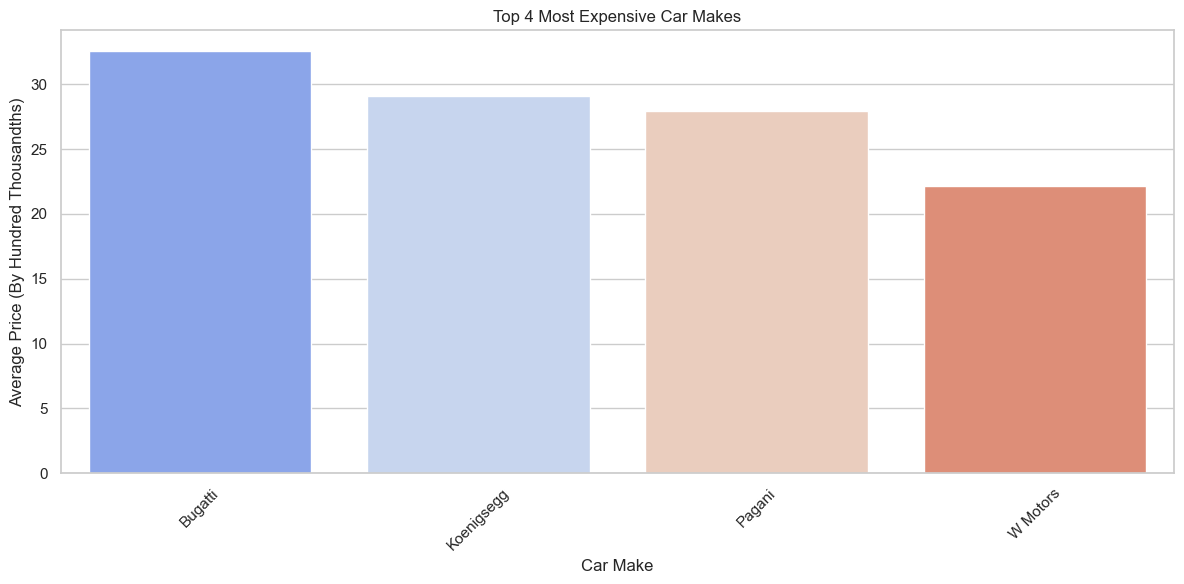

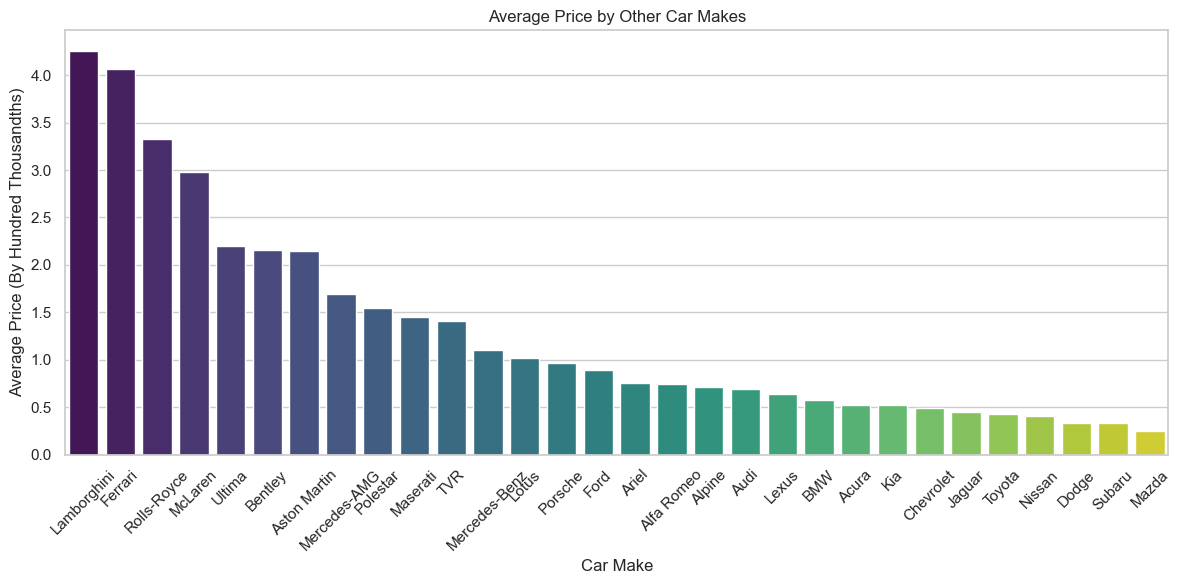

In [3]:
# Load the dataset
data = pd.read_csv('Combined.csv')

# Set up the plotting environment
sns.set(style="whitegrid")

# Average price by car make
avg_price_by_make = data.groupby('car_make')['price'].mean().sort_values(ascending=False)

# Separate the data
most_expensive = avg_price_by_make[:4]
others = avg_price_by_make[4:]

# Plot the top 4 most expensive car makes
plt.figure(figsize=(12, 6))
sns.barplot(x=most_expensive.index, y=most_expensive.values / 100000, palette="coolwarm")
plt.title("Top 4 Most Expensive Car Makes")
plt.ylabel("Average Price (By Hundred Thousandths)")
plt.xlabel("Car Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the other car makes
plt.figure(figsize=(12, 6))
sns.barplot(x=others.index, y=others.values / 100000, palette="viridis")
plt.title("Average Price by Other Car Makes")
plt.ylabel("Average Price (By Hundred Thousandths)")
plt.xlabel("Car Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.3 Price Distribution of Most Common Makes  

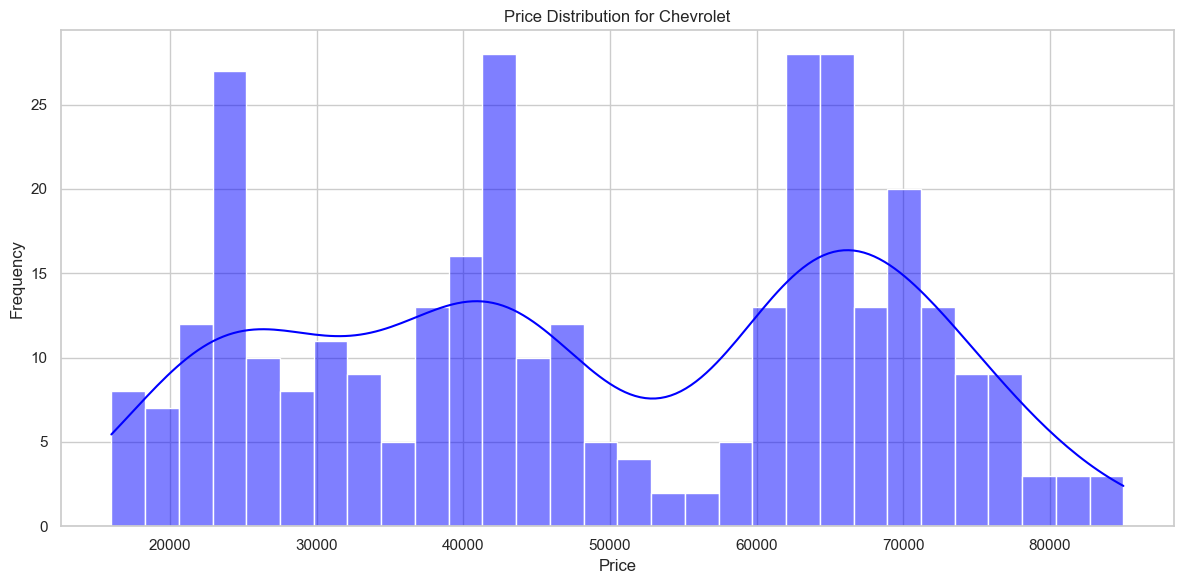

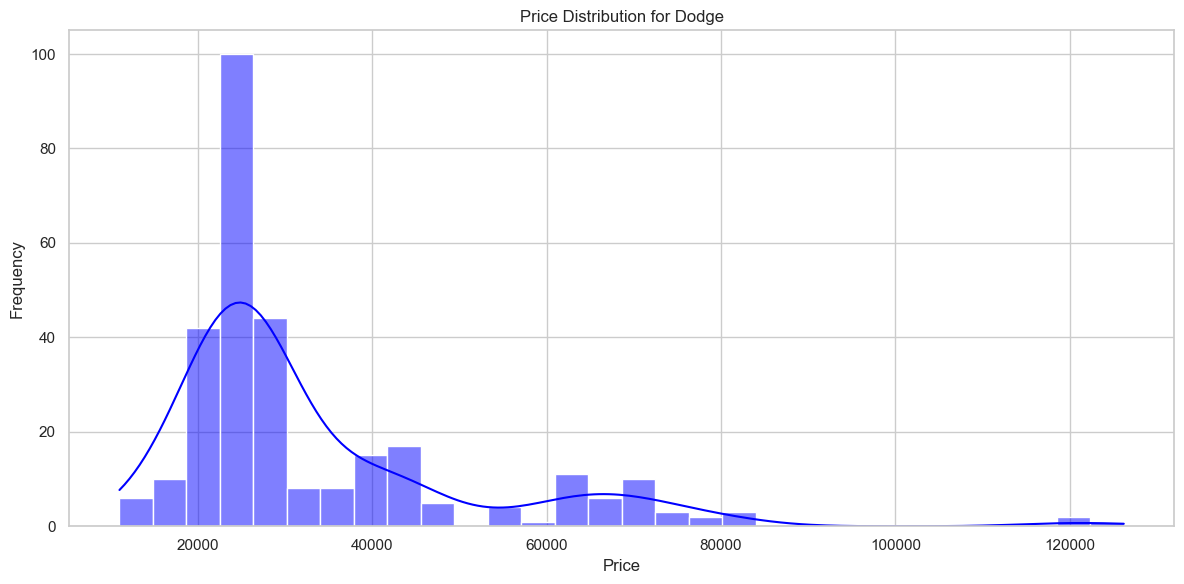

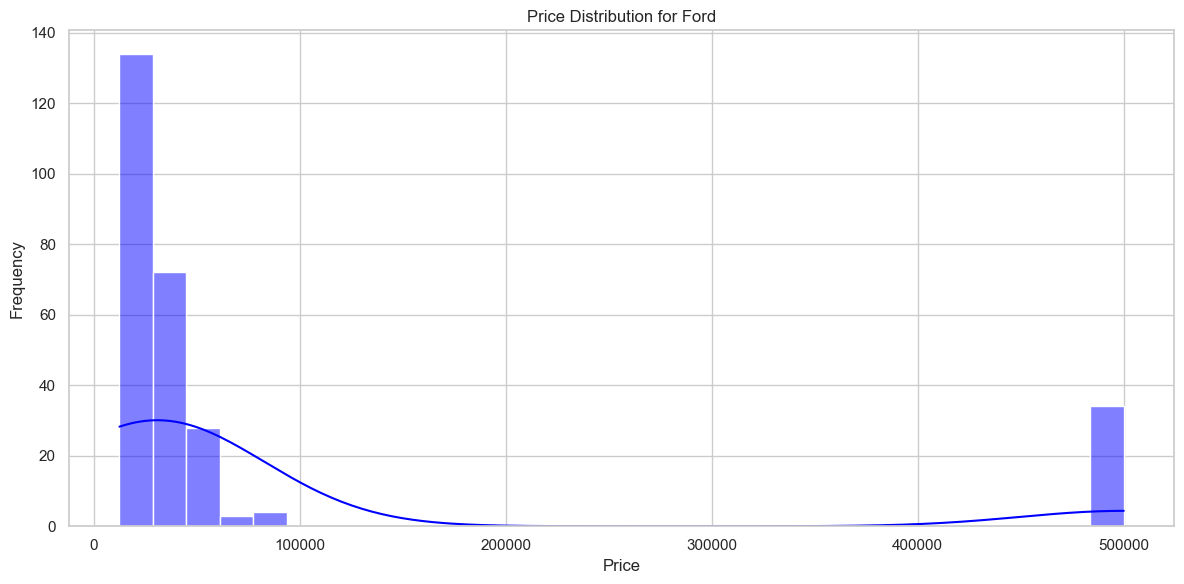

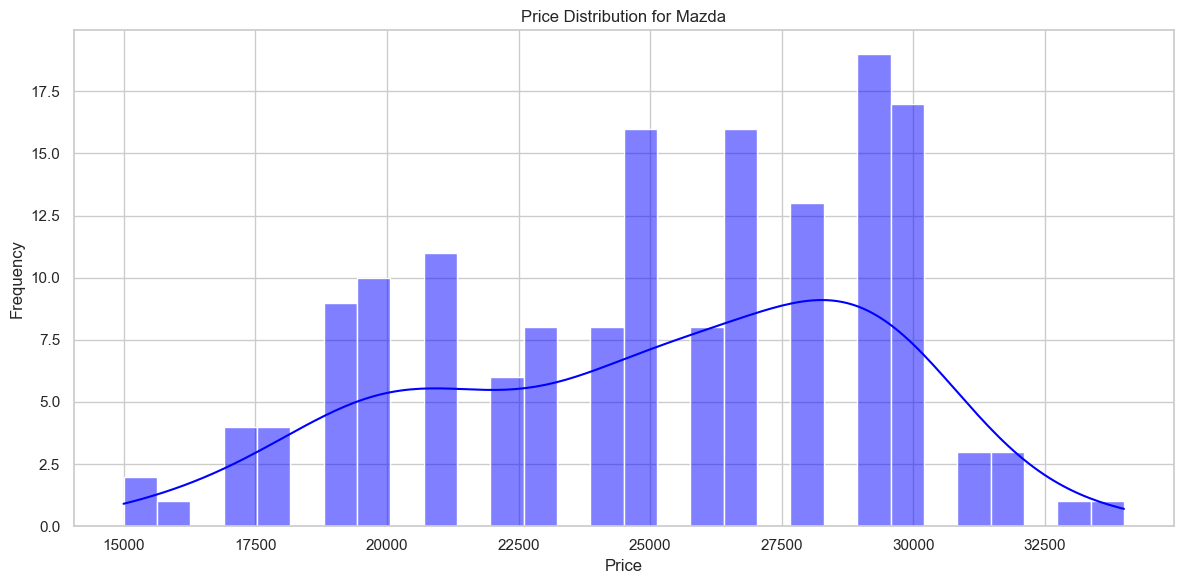

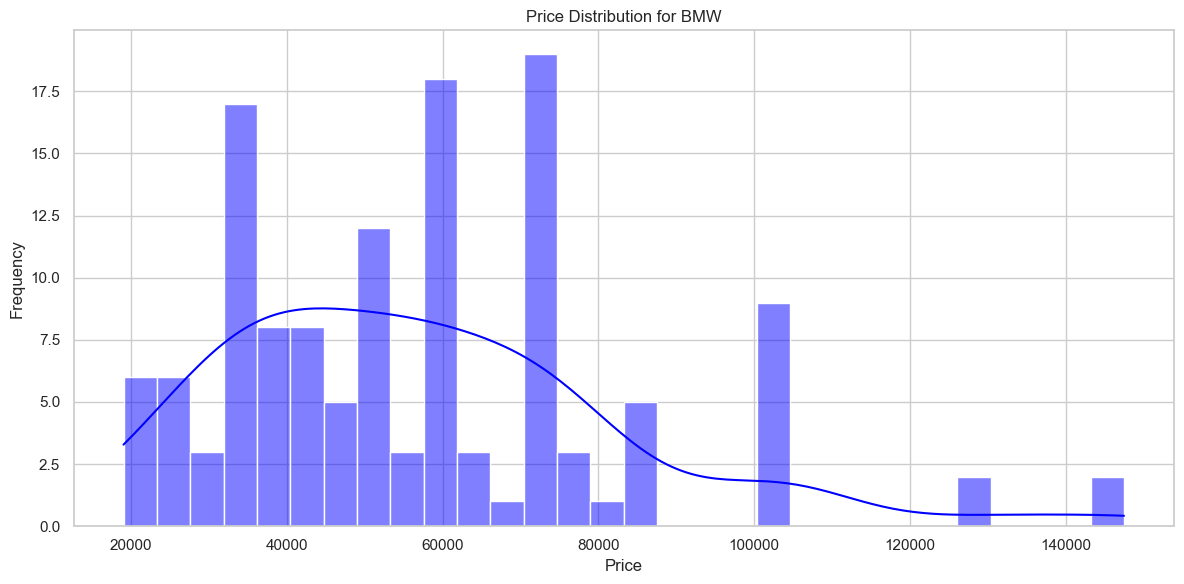

In [4]:
# Load the dataset
data = pd.read_csv('Combined.csv')

# Set up the plotting environment
sns.set(style="whitegrid")

# Find the top 5 most common car makes
top_makes = data['car_make'].value_counts().head(5).index

# Plot distribution charts for the top 5 most common makes
for car_make in top_makes:
    filtered_data = data[data['car_make'] == car_make]

    plt.figure(figsize=(12, 6))
    sns.histplot(filtered_data['price'], bins=30, kde=True, color='blue')
    plt.title(f"Price Distribution for {car_make}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


### 3.4 Distribution of Car Mileage Across Makes 

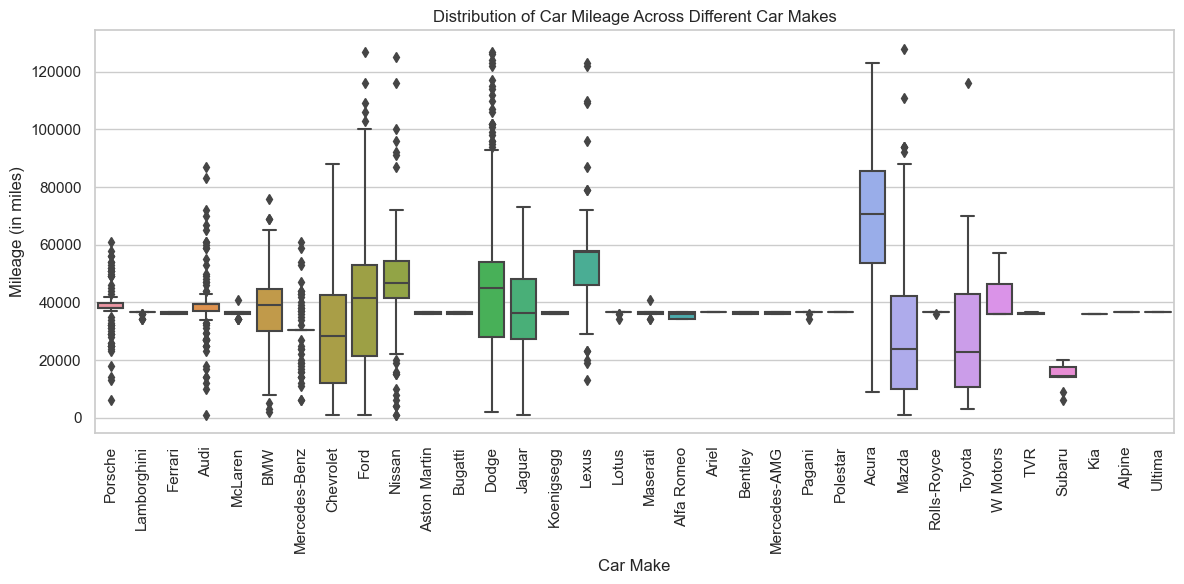

In [5]:
# Load the dataset
df = pd.read_csv('Combined.csv')

# Clean the data
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')  # Convert 'mileage' to numeric, handle errors
df = df.dropna(subset=['mileage'])  # Drop rows with missing 'mileage'

# Visualize the distribution of car mileage across different car makes using a boxplot
plt.figure(figsize=(12, 6))

# Boxplot to show the distribution of mileage across different car makes
sns.boxplot(data=df, x='car_make', y='mileage')

# Add titles and labels
plt.title('Distribution of Car Mileage Across Different Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Mileage (in miles)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()



### 3.5 Distribution of Horsepower Across Most Expensive Makes 

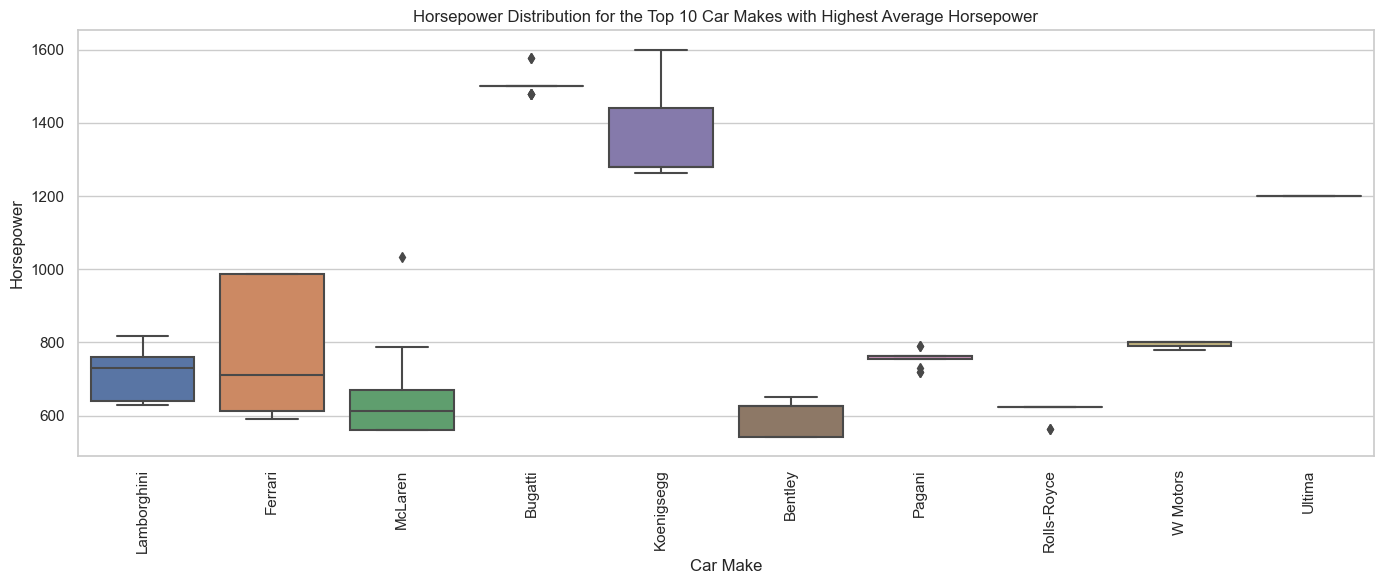

In [6]:
# Load the dataset
df = pd.read_csv('Combined.csv')

# Clean the data
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert 'horsepower' to numeric, handle errors
df = df.dropna(subset=['horsepower'])  # Drop rows with missing 'horsepower'

# Compute the average horsepower for each car make
avg_hp_per_make = df.groupby('car_make')['horsepower'].mean()

# Get the top 10 car makes with the highest average horsepower
top_10_hp_makes = avg_hp_per_make.nlargest(10).index

# Filter the dataset to include only the top 10 car makes
df_filtered = df[df['car_make'].isin(top_10_hp_makes)]

# Visualize the distribution of horsepower for the top 10 car makes
plt.figure(figsize=(14, 6))

# Boxplot to show the distribution of horsepower across the top 10 car makes
sns.boxplot(data=df_filtered, x='car_make', y='horsepower')

# Add titles and labels
plt.title('Horsepower Distribution for the Top 10 Car Makes with Highest Average Horsepower')
plt.xlabel('Car Make')
plt.ylabel('Horsepower')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


### 3.6 Relationship Between Horsepower, Engine Size, and Acceleration Time  

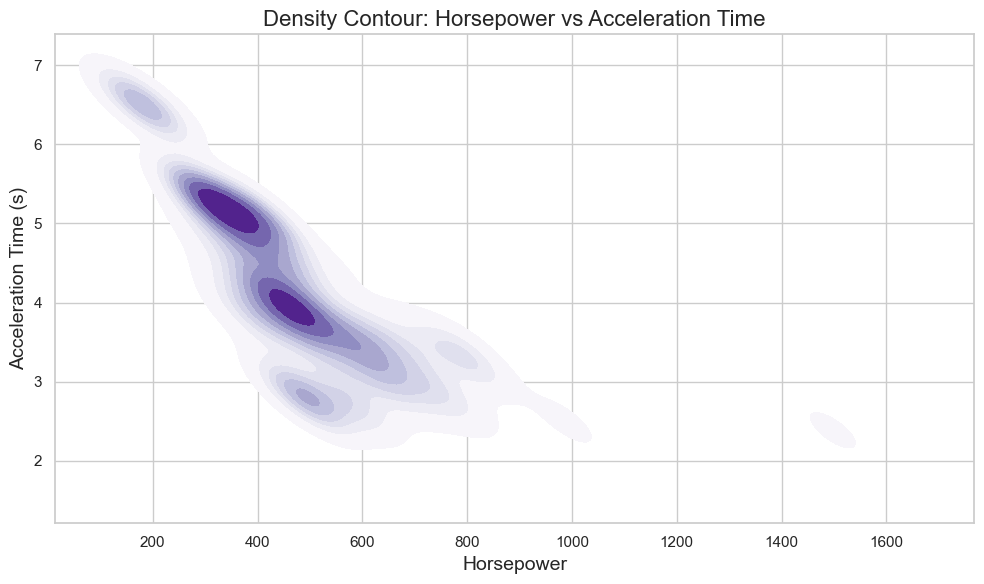

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot acceleration time vs horsepower
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='horsepower', y='acceleration_time', cmap='Purples', fill=True)
plt.title('Density Contour: Horsepower vs Acceleration Time', fontsize=16)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Acceleration Time (s)', fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
# conclusion: Higher horse power leads to lower acceleartion times 

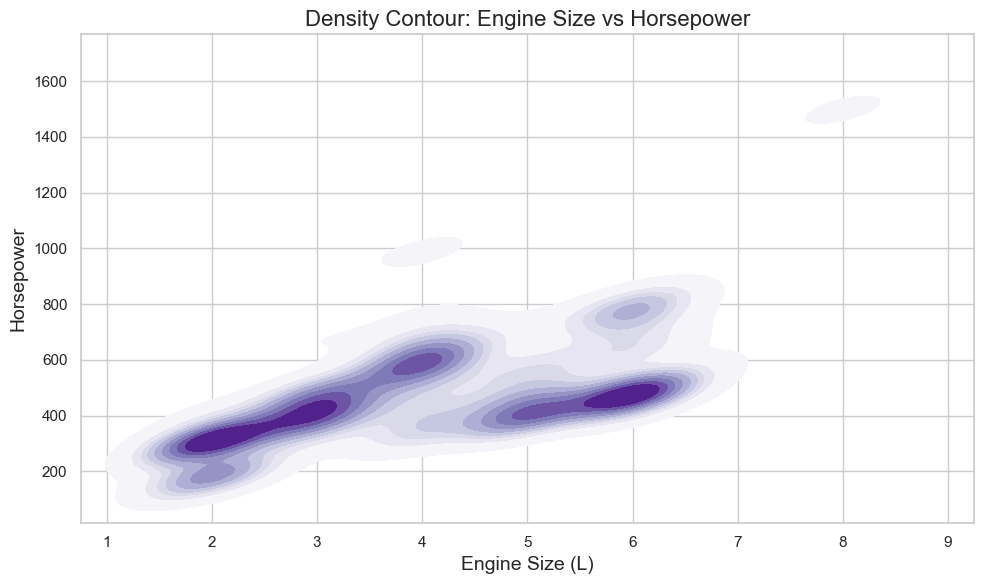

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='engine_size', y='horsepower', cmap='Purples', fill=True)
plt.title('Density Contour: Engine Size vs Horsepower', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=14)
plt.ylabel('Horsepower', fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
# conclusion: Bigger engine size leads to higher horsepower

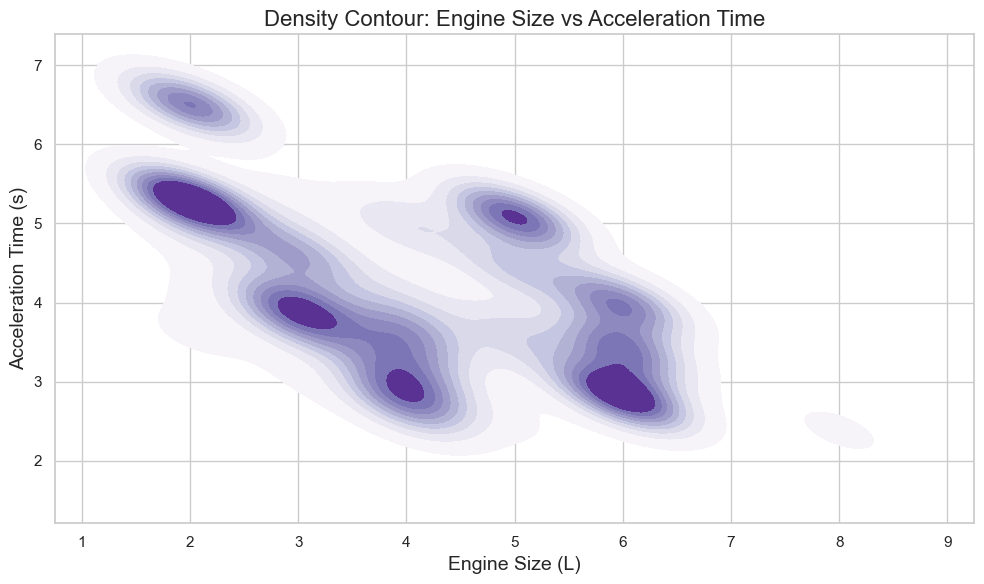

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot engine size vs acceleration time
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='engine_size', y='acceleration_time', cmap='Purples', fill=True)
plt.title('Density Contour: Engine Size vs Acceleration Time', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=14)
plt.ylabel('Acceleration Time (s)', fontsize=14)
plt.tight_layout()
plt.show()
